In [2]:
import pandas as pd
import xgboost as xgb

data = pd.read_csv('/Users/danielpark/Documents/DataScience/extracted_features_combined.csv')

X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Labels (the last column)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Let's assume X is your input features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.59625


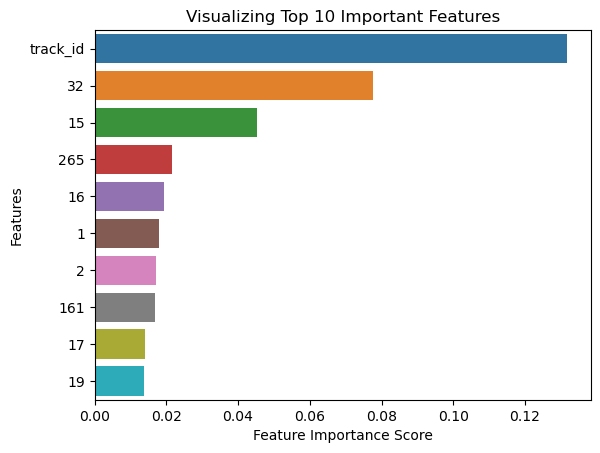

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Get feature importances
feature_importance = gb_clf.feature_importances_

# Convert the feature importances to a Series
feature_importance_series = pd.Series(feature_importance, index=X_train.columns)

# Sort the feature importances and select the top 10
top_10_features = feature_importance_series.sort_values(ascending=False).head(10)

# Plot the feature importances for the top 10 features
sns.barplot(x=top_10_features, y=top_10_features.index)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.show()


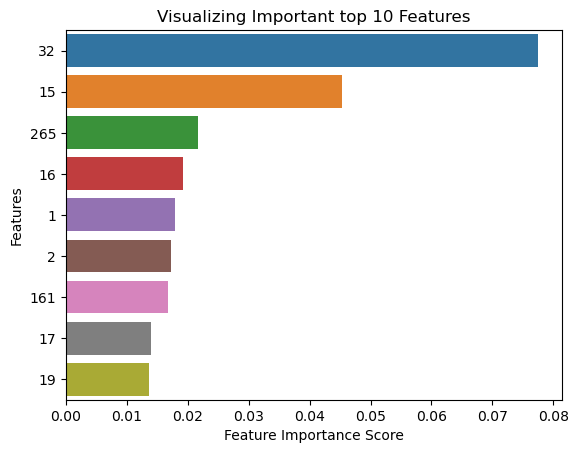

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming gb_clf is your trained Gradient Boosting Classifier
# and X_train is your training dataset with appropriate columns

# Get feature importances
feature_importance = gb_clf.feature_importances_

# Convert the feature importances to a Series
feature_importance_series = pd.Series(feature_importance, index=X_train.columns)

# Sort the feature importances and select features from 2 to 10
sorted_features = feature_importance_series.sort_values(ascending=False)
top_features_2_to_10 = sorted_features.iloc[1:10]  # Skip the first and take the next 9

# Plot the feature importances for features 2 to 10
sns.barplot(x=top_features_2_to_10, y=top_features_2_to_10.index)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important top 10 Features")

# Show the plot
plt.show()


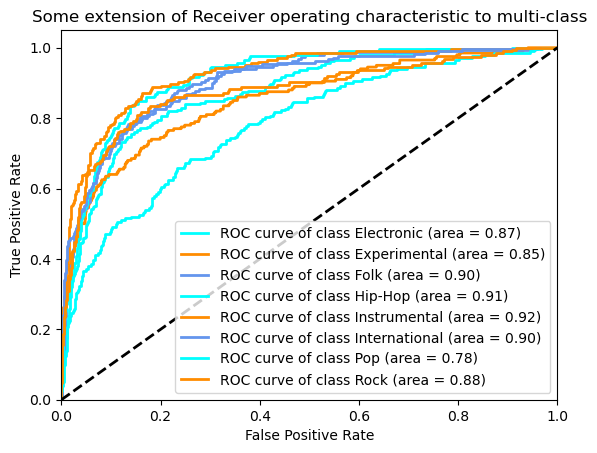

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_bin = label_binarize(y, classes=label_encoder.classes_)
n_classes = y_bin.shape[1]

# Split the data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(gb_clf)
classifier.fit(X_train, y_train_bin)
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
